In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
warnings.simplefilter("ignore") 

In [2]:
df = pd.read_csv(r"C:\03_MISC\UM\cybersecurity_dataset.csv")
df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [3]:
df.tail()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
277,41336,13180,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
278,3638,3190,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
279,25207794,1561220,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
280,5736,12114,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
281,9032,5862,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,147.161.131.1,AT,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule


## Data Preprocessing and EDA

In [4]:
df.columns

Index(['bytes_in', 'bytes_out', 'creation_time', 'end_time', 'src_ip',
       'src_ip_country_code', 'protocol', 'response.code', 'dst_port',
       'dst_ip', 'rule_names', 'observation_name', 'source.meta',
       'source.name', 'time', 'detection_types'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

In [6]:
df.isna().sum()

bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
dtype: int64

In [7]:
df.describe()

,bytes_in,bytes_out,response.code,dst_port
count,2.820000e+02,2.820000e+02,282.0,282.0
mean,1.199390e+06,8.455429e+04,200.0,443.0
std,4.149312e+06,2.549279e+05,0.0,0.0
min,4.000000e+01,4.400000e+01,200.0,443.0
25%,5.381500e+03,1.114200e+04,200.0,443.0
50%,1.318200e+04,1.379950e+04,200.0,443.0
75%,3.083300e+04,2.627950e+04,200.0,443.0
max,2.520779e+07,1.561220e+06,200.0,443.0


In [8]:
# top offending IPs
top_ip =df['src_ip'].value_counts().head(10)
print(top_ip)

src_ip
165.225.209.4      29
165.225.26.101     28
155.91.45.242      28
136.226.67.101     28
147.161.131.1      21
165.225.240.79     18
136.226.77.103     17
147.161.161.82     16
165.225.212.255    15
94.188.248.74      14
Name: count, dtype: int64


In [9]:
# aggregate bytes exchanged
bytes_per_ip = df.groupby('src_ip')[['bytes_in', 'bytes_out']].sum().sort_values(by='bytes_in', ascending=False)
bytes_per_ip.head(10)

,bytes_in,bytes_out
src_ip,,
155.91.45.242,314710879,19551227
165.225.240.79,19639612,721336
136.226.67.101,664597,836200
136.226.64.114,579830,208438
165.225.212.255,484106,174536
136.226.77.103,398090,202778
165.225.209.4,364564,590742
165.225.33.6,360062,244132
165.225.213.7,315880,126202


In [10]:
# bytes exchanged by country
bytes_per_country = df.groupby('src_ip_country_code')[['bytes_in', 'bytes_out']].sum().sort_values(by='bytes_in', ascending=False)
print(bytes_per_country.head(10))


                      bytes_in  bytes_out
src_ip_country_code                      
US                   316412714   21078068
NL                    19639612     721336
CA                     1562640    1094258
DE                      283040     436040
AT                      143512     234970
AE                      124400     150066
IL                       62116     129572


In [11]:
# traffic volume over time
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['hour'] = df['creation_time'].dt.hour  # Extract hour

hourly_traffic = df.groupby('hour')[['bytes_in', 'bytes_out']].sum()
print(hourly_traffic)


       bytes_in  bytes_out
hour                      
0      28129112    2330646
1      32643614    2555354
8     112010383    7577207
9     137216296    9051462
23     28228629    2329641


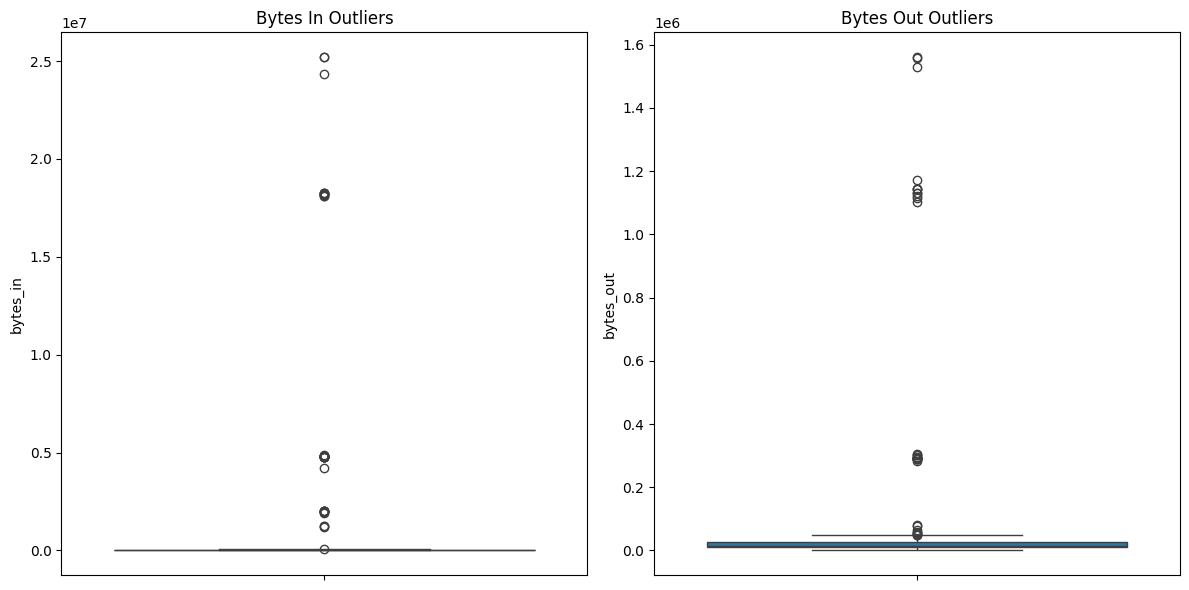

In [12]:
# outlier detection
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(y=df['bytes_in'], ax=axes[0])
axes[0].set_title('Bytes In Outliers')
sns.boxplot(y=df['bytes_out'], ax=axes[1])
axes[1].set_title('Bytes Out Outliers')
plt.tight_layout()
plt.show()

## Model building and evaluation

### Anaomly detection

In [13]:
# Select relevant numerical features
features = ['bytes_in', 'bytes_out']

# Define parameter grid for tuning
param_grid = {
    "n_estimators": [100, 200, 300],  # More trees improve stability
    "max_samples": [0.5, 0.75, 1.0],  # Fraction of dataset used per tree
    "contamination": [0.05, 0.1, 0.2],  # Expected proportion of anomalies
    "max_features": [1.0, 0.8, 0.6]  # Percentage of features used in each tree
}

# Initialize and train the anomaly detector with GridSearchCV
iso_forest = IsolationForest(random_state=42)
grid_search = GridSearchCV(iso_forest, param_grid, cv=5, scoring="accuracy")
grid_search.fit(df[features])

# Apply best model found
best_model = grid_search.best_estimator_
df['Anomaly'] = best_model.fit_predict(df[features])

# Print best parameters and anomaly counts
print("Best Parameters:", grid_search.best_params_)
print(df['Anomaly'].value_counts())


Best Parameters: {'contamination': 0.05, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}
Anomaly
 1    267
-1     15
Name: count, dtype: int64


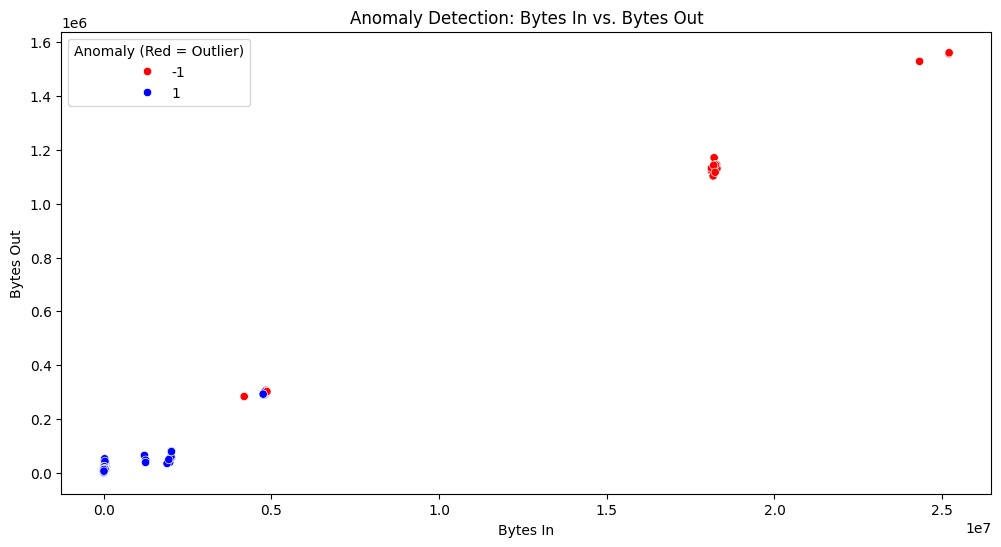

In [14]:
# Scatter plot for anomalies
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['bytes_in'], y=df['bytes_out'], hue=df['Anomaly'], palette={1:'blue', -1:'red'})
plt.title("Anomaly Detection: Bytes In vs. Bytes Out")
plt.xlabel("Bytes In")
plt.ylabel("Bytes Out")
plt.legend(title="Anomaly (Red = Outlier)")
plt.show()

In [15]:
anomalies = df[df['Anomaly'] == -1]
print(anomalies[['src_ip', 'bytes_in', 'bytes_out']].head(10))

            src_ip  bytes_in  bytes_out
36   155.91.45.242   4190330     283456
116  155.91.45.242   4827283     306181
153  155.91.45.242   4869181     301752
169  155.91.45.242  18201558    1170896
176  155.91.45.242  18273120    1145109
185  155.91.45.242  18285525    1130944
194  155.91.45.242  18239056    1144663
200  155.91.45.242  18125238    1121958
211  155.91.45.242  18171403    1103358
229  155.91.45.242  18119202    1132321


In [16]:
model = IsolationForest(contamination=0.05, random_state=42)  # Lower contamination for fewer anomalies
df['Anomaly'] = model.fit_predict(df[features])

In [17]:
print("The anomalies are: ")
print(df[df['Anomaly'] == -1][['src_ip', 'bytes_in', 'bytes_out']])

The anomalies are: 
             src_ip  bytes_in  bytes_out
36    155.91.45.242   4190330     283456
43   165.225.240.79   2015975      79990
87   165.225.240.79   1215594      64362
116   155.91.45.242   4827283     306181
153   155.91.45.242   4869181     301752
169   155.91.45.242  18201558    1170896
176   155.91.45.242  18273120    1145109
185   155.91.45.242  18285525    1130944
200   155.91.45.242  18125238    1121958
211   155.91.45.242  18171403    1103358
229   155.91.45.242  18119202    1132321
248   155.91.45.242  18231909    1116695
257   155.91.45.242  24326941    1529035
267   155.91.45.242  25199191    1557598
279   155.91.45.242  25207794    1561220


### Cluster analysis

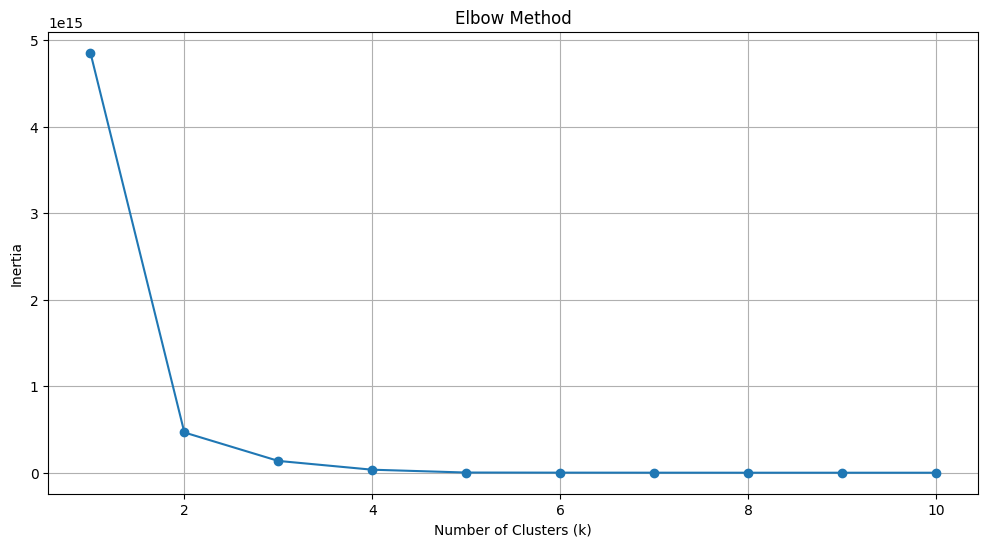

In [18]:
# ellbow curve for optimal k value
inertia =[]
range_k = range(1, 11)
for k in range_k:
    kmeans1 = KMeans(n_clusters=k, random_state=42, n_init= 'auto')
    kmeans1.fit(df[features])
    inertia.append(kmeans1.inertia_)
#print(inertia)
# graph
plt.figure(figsize=(12,6))
plt.plot(range_k, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid()
plt.show()

In [19]:
# Apply clustering on bytes_in and bytes_out
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[features])

# View cluster distribution
print(df['Cluster'].value_counts())


Cluster
0    254
2     16
1     12
Name: count, dtype: int64


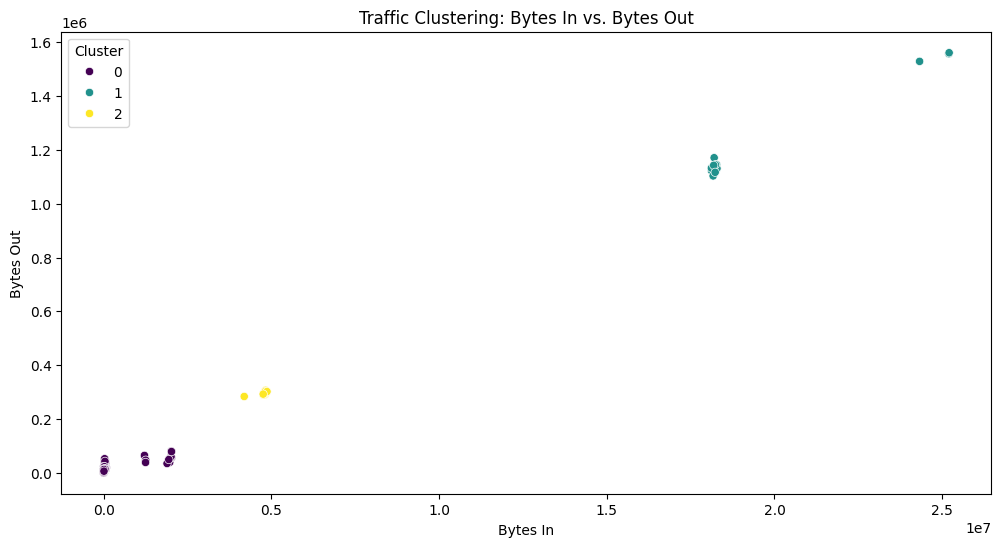

In [20]:
# Scatter plot of clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['bytes_in'], y=df['bytes_out'], hue=df['Cluster'], palette="viridis")
plt.title("Traffic Clustering: Bytes In vs. Bytes Out")
plt.xlabel("Bytes In")
plt.ylabel("Bytes Out")
plt.legend(title="Cluster")
plt.show()


In [21]:
print(df.groupby('Cluster')[['bytes_in', 'bytes_out']].describe())

        bytes_in                                                       \
           count          mean           std         min          25%   
Cluster                                                                 
0          254.0  9.258722e+04  3.666615e+05        40.0      5143.50   
1           12.0  1.988073e+07  3.041642e+06  18119202.0  18183684.25   
2           16.0  4.758885e+06  1.540365e+05   4190330.0   4774381.25   

                                            bytes_out                \
                50%         75%         max     count          mean   
Cluster                                                               
0           10065.0     28522.5   2021960.0     254.0  1.690190e+04   
1        18235482.5  19795879.0  25207794.0      12.0  1.238034e+06   
2         4793743.5   4805739.0   4869181.0      16.0  2.934266e+05   

                                                                      \
                   std        min         25%        50%      

In [22]:
for i in range(3):  # Assuming 3 clusters
    print(f"\nTop IPs in Cluster {i}:")
    print(df[df['Cluster'] == i]['src_ip'].value_counts().head(10))


Top IPs in Cluster 0:
src_ip
165.225.209.4      29
165.225.26.101     28
136.226.67.101     28
147.161.131.1      21
165.225.240.79     18
136.226.77.103     17
147.161.161.82     16
165.225.212.255    15
94.188.248.74      14
136.226.64.114     13
Name: count, dtype: int64

Top IPs in Cluster 1:
src_ip
155.91.45.242    12
Name: count, dtype: int64

Top IPs in Cluster 2:
src_ip
155.91.45.242    16
Name: count, dtype: int64


In [23]:
score = silhouette_score(df[['bytes_in', 'bytes_out']], df['Cluster'])
print(f"Silhouette Score for K-Means: {score:.2f}")

Silhouette Score for K-Means: 0.95
